# Reconstruction of brain FDG PET acquired on Siemens Biograph mMR 
Load listmode data of a brain FDG scan acquired on Siemens Biograph mMR and reconstruct using OSEM. Compare the reconstruction with the reconstruction obtained with the Siemens E7 Tools using the same parameters of the OSEM algorithm. 

In [1]:
import tomolab
import numpy as np
import matplotlib.pyplot as plt

### Static PET reconstruction - Biograph mMR scanner 

In [2]:
pet = tomolab.Reconstruction.PET_Static_Scan()
pet.set_scanner('Biograph_mMR')

In [3]:
# Enable/disable sinogram compression mode
pet.use_compression(False)

#### LOAD MEASUREMENT DATA (90 min)

In [4]:
datapath = '/home/occiput/data/MartinosCenter/realdata/2014_09_05_brain_nf_014_base/'

In [5]:
header = tomolab.DataSources.load_interfile(datapath+'listmode_and_sensitivity/PET_ACQ_506_20140905145126-0.l.hdr')
print('The acquisition is %d minutes' % (header['image duration']['value']/60))

The acquisition is 90 minutes


In [6]:
# Load measurement data 
listmode = 0
if listmode:
    pet.import_listmode(datapath+'listmode_and_sensitivity/PET_ACQ_506_20140905145126-0.l.hdr')
    pet.export_prompts(datapath+'occiput/prompts_2019.h5')
    pet.export_randoms(datapath+'occiput/randoms_2019.h5')
else:
    #pet.import_prompts(datapath+'sinogram/brain_s_time5400_dc_prompts_00.s.hdr')
    pet.import_prompts(datapath+'occiput/prompts_2019.h5')
    pet.import_randoms(datapath+'occiput/randoms_2019.h5')

#### LOAD SENSITIVITY

In [7]:
pet.import_sensitivity(datapath+'norm/norm3d_00.h33')

#### LOAD ATTENUATION

In [8]:
pet.import_attenuation(filename=datapath+'mumap_JSRecon/JSRecon-00-umap.v.hdr', 
                       filename_hardware=datapath+'mumap_JSRecon/JSRecon-00-umap-hardware.v.hdr')

#### LOAD RANDOMS

In [9]:
pet.import_randoms(datapath+'output/smoothed_rand_00.h33')

#### LOAD SCATTER

In [10]:
pet.import_scatter(datapath+'scatter/scatter_3D.s.hdr')

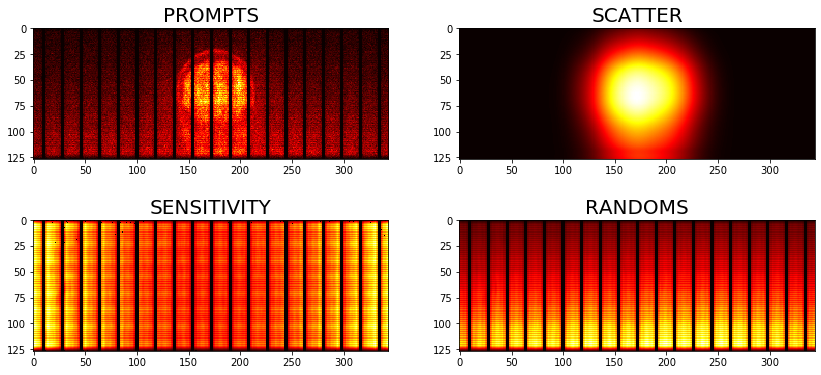

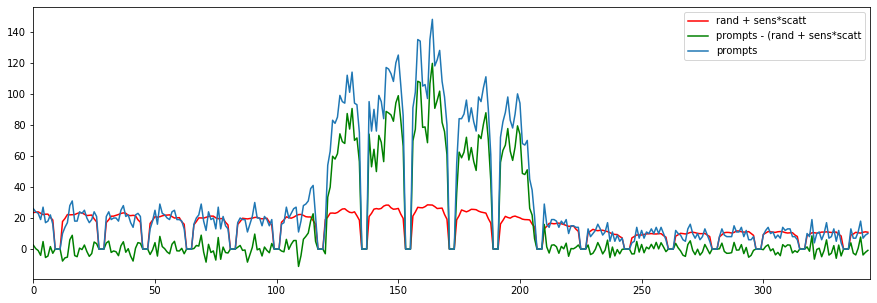

In [11]:
plt.figure(figsize=[14,10])
plt.subplot(3,2,1); plt.imshow(np.flipud(pet.prompts.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('PROMPTS', fontsize=20)
#plt.subplot(3,2,2); plt.imshow(np.flipud(pet.attenuation_projection.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('ATTENUATION PROJECTION', fontsize=20)
plt.subplot(3,2,3); plt.imshow(np.flipud(pet.sensitivity.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('SENSITIVITY', fontsize=20)
plt.subplot(3,2,4); plt.imshow(np.flipud(pet.randoms.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('RANDOMS', fontsize=20)
plt.subplot(3,2,2); plt.imshow(np.flipud(pet.scatter.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('SCATTER', fontsize=20)
pet.quick_inspect()

#### CROP PROJECTION DATA AROUND THE BRAIN AND USE ZOOMED RECONSTRUCTION TO IMPROVE SPEED

In [12]:
res = pet.resolution
#pet.set_activity_shape([128,128,128])
#pet.set_activity_size(pet.activity_shape * res)

In [13]:
pet.brain_crop()

In [14]:
attenuation_projection = pet.project_attenuation(pet.attenuation)

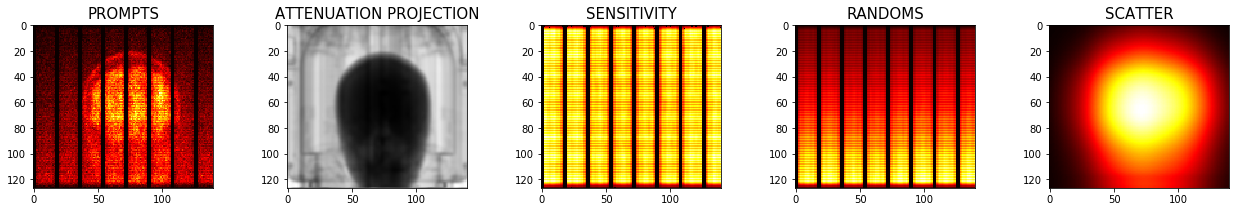

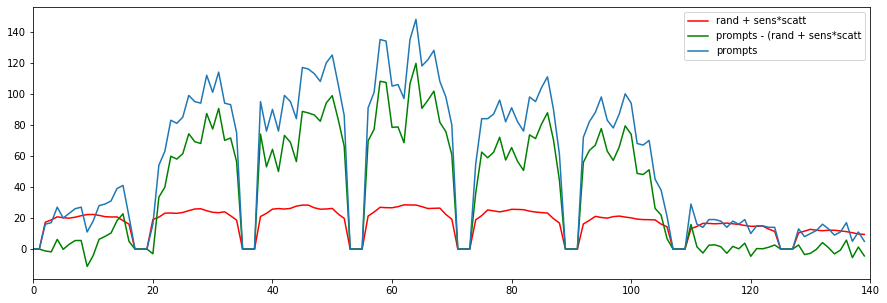

In [15]:
plt.figure(figsize=[22,3])
plt.subplot(1,5,1); plt.imshow(np.flipud(pet.prompts.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('PROMPTS', fontsize=15)
plt.subplot(1,5,2); plt.imshow(np.flipud(pet.attenuation_projection.to_nd_array()[0,5,:,:].transpose()),cmap='gray'),plt.title('ATTENUATION PROJECTION', fontsize=15)
plt.subplot(1,5,3); plt.imshow(np.flipud(pet.sensitivity.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('SENSITIVITY', fontsize=15)
plt.subplot(1,5,4); plt.imshow(np.flipud(pet.randoms.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('RANDOMS', fontsize=15)
plt.subplot(1,5,5); plt.imshow(np.flipud(pet.scatter.to_nd_array()[0,5,:,:].transpose()),cmap='hot'),plt.title('SCATTER', fontsize=15)
pet.quick_inspect()

### RECONSTRUCT

In [29]:
iterations = 3
subset_mode = "ordered_axial"
subset_number = 21

In [30]:
# Reconstruct activity
activity_recon = pet.osem_reconstruction(iterations=iterations, subset_mode=subset_mode, subset_number=subset_number)

subset number: 21
subset size: 12
iterations tot: 63


FloatProgress(value=0.0, bar_style='info', description='OSEM Reconstruction', layout=Layout(border='solid 1px'…

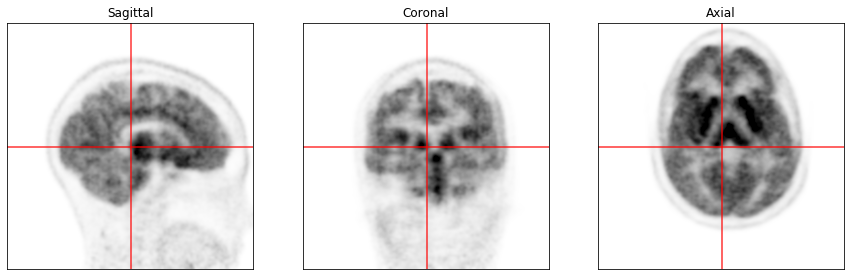

In [33]:
activity_recon.display(figsize=(15,5),clim=(0.0,4.5),crop=120, interp='bicubic', cmap='gist_yarg')

In [19]:
#activity_recon.save_to_file(datapath+'occiput/activity_recon.nii')